---------------------
# Conclusions 

- Seemingly no difference in Shuffled vs Not Shuffled dataframes
- Can drop over 50 features and maintain approx the same percentage range it seems using feature importance from Random Forest Classifier


-------------------

## Imports

In [ ]:

########################### (https://github.com/curiousily/TensorFlow-on-Android-for-Human-Activity-Recognition-with-LSTMs/blob/master/human_activity_recognition.ipynb) imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

#!pip install imbalanced-learn

#from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

from sklearn.utils import shuffle

from matplotlib.pyplot import figure

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier



# Upload Data 

---------------------------------



Train

In [ ]:
from google.colab import files
uploaded_signal_train = files.upload()

Saving 28_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_4_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_4_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_5_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_5_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_6_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_6_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 29_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 29_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_3_Participant_SlideSize_10_Handcrafted_Feat

Test

In [ ]:
from google.colab import files
uploaded_signal_test = files.upload()

Saving 28_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 28_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 28_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 29_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 29_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 32_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 32_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 32_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP to 32_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RJP
Saving 33_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_LJP to 33_7_Participant_SlideSize_10_Handcrafted_Feat

### Reading in segments & labels

Train

In [ ]:
# getting keys, which is file names of npy 
list_of_dataframes_train = [key for key in uploaded_signal_train.keys()]


# set up list to hold all loaded npy 
all_dataframe_train = [] 


for i in range(len(list_of_dataframes_train)):

    # load in the data 
    dataframe_train = pd.read_csv(list_of_dataframes_train[i])


    # append the data to 'all' list
    all_dataframe_train.append(dataframe_train) 


all_df_train = pd.concat(all_dataframe_train)

Test

In [ ]:
# getting keys, which is file names of npy 
list_of_dataframes_test = [key for key in uploaded_signal_test.keys()]


# set up list to hold all loaded npy 
all_dataframe_test = [] 


for i in range(len(list_of_dataframes_test)):

    # load in the data 
    dataframe_test = pd.read_csv(list_of_dataframes_test[i])


    # append the data to 'all' list
    all_dataframe_test.append(dataframe_test) 


all_df_test = pd.concat(all_dataframe_test)


# Quick Look 

In [ ]:
all_df_train.head()

,Unnamed: 0,X_Mean_Acc_Move,Y_Mean_Acc_Move,Z_Mean_Acc_Move,X_Mean_Magnet,Y_Mean_Magnet,Z_Mean_Magnet,Pitch_Mean_Gyro,Roll_Mean_Gyro,Yaw_Mean_Gyro,X_Acc_Move_FFT_EnergyBands,Y_Acc_Move_FFT_EnergyBands,Z_Acc_Move_FFT_EnergyBands,X_Acc_Move_FFT_DominantFrequency,Y_Acc_Move_FFT_DominantFrequency,Z_Acc_Move_FFT_DominantFrequency,X_Acc_Move_FFT_MaxPower,Y_Acc_Move_FFT_MaxPower,Z_Acc_Move_FFT_MaxPower,X_Acc_Move_FFT_MeanWeightedFrequency,Y_Acc_Move_FFT_MeanWeightedFrequency,Z_Acc_Move_FFT_MeanWeightedFrequency,X_Acc_Move_FFT_SkewnessFrequency,Y_Acc_Move_FFT_SkewnessFrequency,Z_Acc_Move_FFT_SkewnessFrequency,X_Acc_Move_FFT_KurtosisFrequency,Y_Acc_Move_FFT_KurtosisFrequency,Z_Acc_Move_FFT_KurtosisFrequency,X_Magnet_ChangeOfSign,Y_Magnet_ChangeOfSign,Z_Magnet_ChangeOfSign,X_std_Acc_Move,Y_std_Acc_Move,Z_std_Acc_Move,X_std_Magnet,Y_std_Magnet,Z_std_Magnet,Pitch_std_Gyro,Roll_std_Gyro,Yaw_std_Gyro,...,Z_max_Magnet,Pitch_max_Gyro,Roll_max_Gyro,Yaw_max_Gyro,X_min_Acc_Move,Y_min_Acc_Move,Z_min_Acc_Move,X_min_Magnet,Y_min_Magnet,Z_min_Magnet,Pitch_min_Gyro,Roll_min_Gyro,Yaw_min_Gyro,SMA_Acc_Move,SMA_Magnet,SMA_Gyro,Energy_Acc_Move,Energy_Magnet,Energy_Gyro,X_iqr_Acc_Move,Y_iqr_Acc_Move,Z_iqr_Acc_Move,X_iqr_Magnet,Y_iqr_Magnet,Z_iqr_Magnet,Pitch_iqr_Gyro,Roll_iqr_Gyro,Yaw_iqr_Gyro,XY_corr_Acc_Move,XZ_corr_Acc_Move,YZ_corr_Acc_Move,XY_corr_Magnet,XZ_corr_Magnet,YZ_corr_Magnet,Pitch_Roll_corr_Gyro,Pitch_Yaw_corr_Gyro,Roll_Yaw_corr_Gyro,Label_segment,Participant_ID,Participant_Run
0,0,-0.345651,0.243621,-0.378761,-7.702587,-36.274094,6.544647,-0.001866,-0.004209,0.010049,[ 4.44089210e-16+0.j -1.36743098e-01-0...,[ 5.55111512e-16+0.j 6.02078568e-02-0...,[ 5.55111512e-16+0.j 6.02078568e-02-0...,10.0,10.0,10.0,0.226947,0.270919,0.270919,1.014269,1.463456,1.463456,1.014269,1.463456,1.463456,1.085933,0.136027,0.136027,0,0,0,0.032882,0.042589,0.044694,0.221493,0.374326,0.246606,0.001253,0.000584,0.000988,...,6.783730,-0.000156,-0.003209,0.011021,-0.393286,0.181635,-0.442786,-8.061852,-36.759109,6.201022,-0.003715,-0.005141,0.007720,0.968032,50.521328,0.016125,0.327178,1418.222109,0.000125,0.062303,0.065942,0.081665,0.338572,0.585278,0.494285,0.001920,0.000705,0.001263,0.493614,-0.501615,0.316065,-0.743477,-0.409541,0.266258,0.241051,0.162547,0.253310,Go,28,2
1,1,-0.319342,0.162098,-0.342011,-7.738424,-36.147514,6.689313,-0.001100,-0.004092,0.008219,[-2.22044605e-16+0.j 8.10724443e-02+0...,[-1.11022302e-16+0.j 1.73273293e-01-0...,[-1.11022302e-16+0.j 1.73273293e-01-0...,10.0,10.0,10.0,0.349178,0.331988,0.331988,1.409548,1.535443,1.535443,1.409548,1.535443,1.535443,1.111614,1.028266,1.028266,0,0,0,0.050333,0.048506,0.066542,0.257834,0.426416,0.117972,0.000964,0.000973,0.002203,...,6.783730,-0.000156,-0.002876,0.011021,-0.393286,0.091814,-0.442786,-8.061852,-36.771113,6.386037,-0.003107,-0.006575,0.004726,0.823451,50.575251,0.013411,0.254541,1411.535084,0.000092,0.090104,0.085942,0.099641,0.480858,0.823928,0.138442,0.000823,0.000870,0.003775,-0.686037,0.400664,-0.931307,-0.672780,0.220964,-0.295968,0.735916,0.368056,0.203087,Go,28,2
2,2,-0.271131,0.152904,-0.319191,-7.378853,-36.185124,6.572727,-0.000447,-0.003125,0.005925,[ 2.77555756e-17+0.j -1.63596684e-01-0...,[-2.77555756e-17+0.j -1.22561277e-01+0...,[-2.77555756e-17+0.j -1.22561277e-01+0...,10.0,10.0,10.0,0.166835,0.279101,0.279101,1.472690,0.708644,0.708644,1.472690,0.708644,0.708644,0.071999,1.012308,1.012308,0,0,0,0.027377,0.040053,0.049630,0.591822,0.368272,0.125559,0.001518,0.001659,0.000804,...,6.757243,0.001655,-0.000278,0.007255,-0.328298,0.091814,-0.400806,-7.994001,-36.771113,6.386037,-0.003107,-0.006575,0.004726,0.743226,50.136704,0.010305,0.203591,1407.513063,0.000051,0.038717,0.067301,0.069507,1.036439,0.670277,0.184128,0.001735,0.001489,0.001226,0.226927,-0.656599,-0.653995,-0.625427,0.540082,-0.179181,0.780441,-0.404743,-0.199011,Go,28,2
3,3,-0.249181,0.161472,-0.330511,-6.654501,-36.508391,6.678391,0.000861,-0.001989,0.005660,[-2.22044605e-16+0.j 6.36372285e-02+0...,[-9.71445147e-17

In [ ]:
all_df_test.head()

,Unnamed: 0,X_Mean_Acc_Move,Y_Mean_Acc_Move,Z_Mean_Acc_Move,X_Mean_Magnet,Y_Mean_Magnet,Z_Mean_Magnet,Pitch_Mean_Gyro,Roll_Mean_Gyro,Yaw_Mean_Gyro,X_Acc_Move_FFT_EnergyBands,Y_Acc_Move_FFT_EnergyBands,Z_Acc_Move_FFT_EnergyBands,X_Acc_Move_FFT_DominantFrequency,Y_Acc_Move_FFT_DominantFrequency,Z_Acc_Move_FFT_DominantFrequency,X_Acc_Move_FFT_MaxPower,Y_Acc_Move_FFT_MaxPower,Z_Acc_Move_FFT_MaxPower,X_Acc_Move_FFT_MeanWeightedFrequency,Y_Acc_Move_FFT_MeanWeightedFrequency,Z_Acc_Move_FFT_MeanWeightedFrequency,X_Acc_Move_FFT_SkewnessFrequency,Y_Acc_Move_FFT_SkewnessFrequency,Z_Acc_Move_FFT_SkewnessFrequency,X_Acc_Move_FFT_KurtosisFrequency,Y_Acc_Move_FFT_KurtosisFrequency,Z_Acc_Move_FFT_KurtosisFrequency,X_Magnet_ChangeOfSign,Y_Magnet_ChangeOfSign,Z_Magnet_ChangeOfSign,X_std_Acc_Move,Y_std_Acc_Move,Z_std_Acc_Move,X_std_Magnet,Y_std_Magnet,Z_std_Magnet,Pitch_std_Gyro,Roll_std_Gyro,Yaw_std_Gyro,...,Z_max_Magnet,Pitch_max_Gyro,Roll_max_Gyro,Yaw_max_Gyro,X_min_Acc_Move,Y_min_Acc_Move,Z_min_Acc_Move,X_min_Magnet,Y_min_Magnet,Z_min_Magnet,Pitch_min_Gyro,Roll_min_Gyro,Yaw_min_Gyro,SMA_Acc_Move,SMA_Magnet,SMA_Gyro,Energy_Acc_Move,Energy_Magnet,Energy_Gyro,X_iqr_Acc_Move,Y_iqr_Acc_Move,Z_iqr_Acc_Move,X_iqr_Magnet,Y_iqr_Magnet,Z_iqr_Magnet,Pitch_iqr_Gyro,Roll_iqr_Gyro,Yaw_iqr_Gyro,XY_corr_Acc_Move,XZ_corr_Acc_Move,YZ_corr_Acc_Move,XY_corr_Magnet,XZ_corr_Magnet,YZ_corr_Magnet,Pitch_Roll_corr_Gyro,Pitch_Yaw_corr_Gyro,Roll_Yaw_corr_Gyro,Label_segment,Participant_ID,Participant_Run
0,0,-0.682452,-1.537566,1.163282,-31.175807,15.108035,6.015167,0.937977,-0.072320,-0.046816,[-2.22044605e-16+0.j 1.53001337e-01+0...,[ 1.22124533e-15+0.j 1.22016169e+00+2...,[ 1.22124533e-15+0.j 1.22016169e+00+2...,20.0,10.0,10.0,0.643152,2.448863,2.448863,4.655601,14.411731,14.411731,4.655601,14.411731,14.411731,-0.661059,0.386908,0.386908,0,0,0,0.109038,0.380652,0.214096,0.662956,1.406793,0.416355,0.222151,0.088708,0.011931,...,6.772522,1.446242,-0.019637,-0.021178,-0.830064,-1.931298,0.771279,-32.231030,12.583961,5.367462,0.653755,-0.305338,-0.062037,3.383299,52.299009,1.057113,4.385696,1238.957808,0.944586,0.140295,0.525360,0.224491,0.294349,0.401318,0.453442,0.187720,0.022940,0.015471,0.666391,-0.695607,-0.953410,0.983856,0.946480,0.928574,-0.878817,0.824730,-0.600255,Go,28,7
1,1,-0.570402,-1.360722,1.709553,-32.287807,12.585200,5.150206,1.381306,-0.296202,-0.136848,[-7.21644966e-16+0.j 1.05372356e-01+0...,[ 2.77555756e-15+0.j -1.88132267e+00-1...,[ 2.77555756e-15+0.j -1.88132267e+00-1...,20.0,10.0,10.0,0.860700,2.244292,2.244292,9.321138,8.889377,8.889377,9.321138,8.889377,8.889377,-0.050429,0.711532,0.711532,0,0,0,0.151184,0.332196,0.796803,0.834394,2.198260,0.604916,0.315140,0.219459,0.140874,...,5.863824,1.718010,-0.023043,-0.021178,-0.829737,-1.874020,0.771279,-33.791976,7.878010,4.060401,0.901326,-0.633810,-0.448732,3.640678,50.023212,1.814355,5.867602,1233.308799,2.181790,0.219628,0.541532,1.328693,1.394364,3.066943,1.099722,0.590682,0.332308,0.122365,-0.061180,0.647081,-0.624960,0.984721,0.980586,0.951740,-0.906847,-0.608250,0.856768,Go,28,7
2,2,-0.432210,-1.553906,2.907824,-33.842049,8.614268,4.289888,1.360710,-0.788843,-0.515477,[ 8.60422844e-16+0.j -1.86008136e-01+0...,[0. +0.j 0.75013999-0.48745819j...,[0. +0.j 0.75013999-0.48745819j...,20.0,10.0,10.0,0.906017,0.894609,0.894609,9.525538,14.787252,14.787252,9.525538,14.787252,14.787252,0.162686,-0.369606,-0.369606,0,0,0,0.155728,0.212389,0.734981,1.065952,2.695428,0.457061,0.372331,0.351509,0.310274,...,5.337253,1.718010,-0.360445,-0.074735,-0.730284,-1.799700,1.278333,-35.322797,5.257983,3.845828,0.585038,-1.394647,-0.914100,4.893939,46.746205,2.665030,11.666423,1246.503540,3.097979,0.159782,0.112439,0.853469,1.991838,5.399224,0.637311,0.488967,0.584246,0.595479,-0.895770,0.851415,-0.958038,0.974470,0.860691,0.909989,0.948261,0.878602,0.979366,Go,28,7
3,3,-0.352377,-1.637925,3.038907,-35.772118,4.248740,4.181738,0.713154,-1.206948,-0.564155,[ 3.88578059e-16+0.j -2.15915596e-01-0...,[-1.33226763e-15+0.j

# Train Test Split 

In [ ]:
# Getting X_train & y_train'
X_train = all_df_train.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run', 'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands'	], axis = 1)
y_train = all_df_train['Label_segment'].values

In [ ]:
# Getting X_train & y_train
X_test = all_df_test.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run',  'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands'], axis = 1)
y_test = all_df_test['Label_segment'].values

---------------------------

Add Shuffle just incase it might help 

In [ ]:
all_df_train_shuffled = shuffle(all_df_train)
all_df_test_shuffled = shuffle(all_df_test)

In [ ]:
# Getting X_train & y_train
X_train_sh = all_df_train.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run', 'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands'], axis = 1)
y_train_sh = all_df_train['Label_segment'].values

# Getting X_train & y_train
X_test_sh = all_df_test.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run', 'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands'], axis = 1)
y_test_sh = all_df_test['Label_segment'].values

--------------------------------------

Standard Scale 

In [ ]:
# Set up ss for non-shuffled data
ss = StandardScaler()
# Set up ss for shuffled data
ss_sh = StandardScaler()

# fit for non-shuffled
X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)

# fit for shuffled
X_train_sh_scale = ss_sh.fit_transform(X_train_sh)
X_test_sh_scale = ss_sh.transform(X_test_sh)

----------------------------------------------

### Non Shuffled

In [ ]:
from sklearn.metrics import accuracy_score, log_loss , recall_score , f1_score, precision_score , roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LinearSVC(),
    SGDClassifier(),
    MLPClassifier(),
    PassiveAggressiveClassifier(),
    LabelPropagation(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier()    ]


# list to hold for dataframe
classifier_name_list = []
train_acc_list = []
train_bacc_list = []
test_acc_list = []
test_bacc_list = []
train_recall_list = []
test_recall_list = []
train_precision_list = []
test_precision_list = []
train_f1_list = []
test_f1_list = []


for clf in classifiers:
    clf.fit(X_train_scale, y_train)
    name = clf.__class__.__name__
    
    print("="*50)
    print(name)
    
    print('****Results****')

    # Test Predictions
    test_predictions = clf.predict(X_test_scale)

    # Test Metrics
    acc            = accuracy_score(y_test, test_predictions)
    bal_acc        = balanced_accuracy_score(y_test, test_predictions)
    recall_test    = recall_score(y_test, test_predictions, average = 'weighted')
    f1_test        = f1_score(y_test, test_predictions ,  average = 'weighted')
    precision_test = precision_score(y_test, test_predictions,  average = 'weighted') 



    # Train Predictions
    train_predictions = clf.predict(X_train_scale)

    # Train Metrics
    train_acc       = accuracy_score(y_train, train_predictions)
    train_bal_acc   = balanced_accuracy_score(y_train, train_predictions)
    recall_train    = recall_score(y_train, train_predictions , average = 'weighted')
    f1_train        = f1_score(y_train, train_predictions ,  average = 'weighted')
    precision_train = precision_score(y_train, train_predictions,  average = 'weighted') 

    print("\n\nTest Classification Report\n")
    print(classification_report(y_test, test_predictions))

    # append to list to make a dataframe 
    classifier_name_list.append(name)
    train_acc_list.append(train_acc)
    test_acc_list.append(acc)

    train_bacc_list.append(train_bal_acc)
    test_bacc_list.append(bal_acc)

    train_recall_list.append(recall_train)
    test_recall_list.append(recall_test)

    train_precision_list.append(precision_train)
    test_precision_list.append(precision_test)

    train_f1_list.append(f1_train)
    test_f1_list.append(f1_test)




print("="*50)




KNeighborsClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.60      0.62      0.61       745
      Turn 1       0.52      0.72      0.60      1322
      Turn 2       0.64      0.54      0.59      1558
      Walk 1       0.38      0.24      0.29       803
      Walk 2       0.48      0.41      0.44       786
         sit       0.32      0.40      0.36       553

    accuracy                           0.52      5767
   macro avg       0.49      0.49      0.48      5767
weighted avg       0.52      0.52      0.51      5767

DecisionTreeClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.79      0.43      0.56       745
      Turn 1       0.62      0.70      0.66      1322
      Turn 2       0.74      0.59      0.66      1558
      Walk 1       0.36      0.37      0.36       803
      Walk 2       0.49      0.52      0.50       

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.26      0.77      0.39       745
      Turn 1       0.49      0.07      0.12      1322
      Turn 2       0.44      0.02      0.04      1558
      Walk 1       0.29      0.29      0.29       803
      Walk 2       0.20      0.64      0.31       786
         sit       0.52      0.06      0.10       553

    accuracy                           0.25      5767
   macro avg       0.37      0.31      0.21      5767
weighted avg       0.38      0.25      0.18      5767



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.70      0.21      0.33       745
      Turn 1       0.37      0.60      0.46      1322
      Turn 2       0.49      0.64      0.56      1558
      Walk 1       0.40      0.33      0.36       803
      Walk 2       0.39      0.24      0.30       786
         sit       0.40      0.19      0.26       553

    accuracy                           0.43      5767
   macro avg       0.46      0.37      0.38      5767
weighted avg       0.46      0.43      0.41      5767

SGDClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.55      0.37      0.44       745
      Turn 1       0.36      0.58      0.44      1322
      Turn 2       0.52      0.48      0.50      1558
      Walk 1       0.34      0.29      0.31       803
      Walk 2       0.30      0.17      0.22       786
         sit    

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.79      0.48      0.60       745
      Turn 1       0.67      0.74      0.71      1322
      Turn 2       0.76      0.56      0.65      1558
      Walk 1       0.40      0.36      0.38       803
      Walk 2       0.48      0.57      0.52       786
         sit       0.30      0.57      0.39       553

    accuracy                           0.57      5767
   macro avg       0.57      0.55      0.54      5767
weighted avg       0.61      0.57      0.58      5767

PassiveAggressiveClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.15      0.01      0.03       745
      Turn 1       0.35      0.39      0.37      1322
      Turn 2       0.44      0.27      0.33      1558
      Walk 1       0.35      0.22      0.27       803
      Walk 2       0.20      0.37      0.26       78

/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer




Test Classification Report

              precision    recall  f1-score   support

          Go       0.41      0.71      0.52       745
      Turn 1       0.58      0.56      0.57      1322
      Turn 2       0.65      0.48      0.55      1558
      Walk 1       0.38      0.22      0.28       803
      Walk 2       0.43      0.44      0.44       786
         sit       0.26      0.36      0.30       553

    accuracy                           0.47      5767
   macro avg       0.45      0.46      0.44      5767
weighted avg       0.50      0.47      0.47      5767

ExtraTreesClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.94      0.62      0.75       745
      Turn 1       0.66      0.90      0.76      1322
      Turn 2       0.81      0.70      0.75      1558
      Walk 1       0.53      0.35      0.42       803
      Walk 2       0.65      0.66      0.65       786
         sit       0.41      0.61  

In [ ]:
metrics_df = pd.DataFrame()


metrics_df['Classifier'] = classifier_name_list

# F1 Score First 
metrics_df['Train F1'] = train_f1_list
metrics_df['Test F1'] = test_f1_list 

# Recall
metrics_df['Train Recall'] = train_recall_list
metrics_df['Test Recall'] = test_recall_list

# Precision 
metrics_df['Train Precision'] = train_precision_list
metrics_df['Test Precision'] = test_precision_list

# Bal Acc
metrics_df['Train Balanced Accuracy'] = train_bacc_list
metrics_df['Test Balanced Accuracy'] = test_bacc_list

# Accuracy 
metrics_df['Train Accuracy'] = train_acc_list
metrics_df['Test Accuracy'] = test_acc_list 


metrics_df.sort_values("Test F1" , ascending=False , inplace=True)
metrics_df.set_index('Classifier' , inplace=True)

# display df
display(metrics_df)

,Train F1,Test F1,Train Recall,Test Recall,Train Precision,Test Precision,Train Balanced Accuracy,Test Balanced Accuracy,Train Accuracy,Test Accuracy
Classifier,,,,,,,,,,
RandomForestClassifier,1.000000,0.689790,1.000000,0.693081,1.000000,0.706480,1.000000,0.667906,1.000000,0.693081
ExtraTreesClassifier,1.000000,0.668644,1.000000,0.671059,1.000000,0.693927,1.000000,0.638318,1.000000,0.671059
GradientBoostingClassifier,0.843788,0.652025,0.845082,0.654413,0.848087,0.672124,0.830262,0.636304,0.845082,0.654413
BaggingClassifier,0.995084,0.633712,0.995086,0.631177,0.995098,0.658992,0.994459,0.601801,0.995086,0.631177
MLPClassifier,0.921471,0.576346,0.921558,0.567366,0.921645,0.612713,0.916575,0.547940,0.921558,0.567366
DecisionTreeClassifier,1.000000,0.558772,1.000000,0.551240,1.000000,0.591101,1.000000,0.526855,1.000000,0.551240
DecisionTreeClassifier,1.000000,0.552705,1.000000,0.544824,1.000000,0.586536,1.000000,0.520654,1.000000,0.544824
KNeighborsClassifier,0.831829,0.512344,0.833557,0.519508,0.839546,0.520844,0.823866,0.488790,0.833557,0.519508
AdaBoostClassifier,0.481599,0.497827,0.499866,0.503555,0.486136,0.515739,0.474285,0.469230,0.499866,0.503555


### Shuffled 

In [ ]:
# same code 

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LinearSVC(),
    SGDClassifier(),
    MLPClassifier(),
    PassiveAggressiveClassifier(),
    LabelPropagation(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier()    ]


# list to hold for dataframe
classifier_name_list = []
train_acc_list = []
train_bacc_list = []
test_acc_list = []
test_bacc_list = []
train_recall_list = []
test_recall_list = []
train_precision_list = []
test_precision_list = []
train_f1_list = []
test_f1_list = []


for clf in classifiers:
    clf.fit(X_train_sh_scale, y_train_sh)
    name = clf.__class__.__name__
    
    print("="*50)
    print(name)
    
    print('****Results****')

    # Test Predictions
    test_predictions = clf.predict(X_test_sh_scale)

    # Test Metrics
    acc            = accuracy_score(y_test_sh, test_predictions)
    bal_acc        = balanced_accuracy_score(y_test_sh, test_predictions)
    recall_test    = recall_score(y_test_sh, test_predictions, average = 'weighted')
    f1_test        = f1_score(y_test_sh, test_predictions ,  average = 'weighted')
    precision_test = precision_score(y_test_sh, test_predictions,  average = 'weighted') 



    # Train Predictions
    train_predictions = clf.predict(X_train_sh_scale)

    # Train Metrics
    train_acc       = accuracy_score(y_train_sh, train_predictions)
    train_bal_acc   = balanced_accuracy_score(y_train_sh, train_predictions)
    recall_train    = recall_score(y_train_sh, train_predictions , average = 'weighted')
    f1_train        = f1_score(y_train_sh, train_predictions ,  average = 'weighted')
    precision_train = precision_score(y_train_sh, train_predictions,  average = 'weighted') 

    print("\n\nTest Classification Report\n")
    print(classification_report(y_test_sh, test_predictions))

    # append to list to make a dataframe 
    classifier_name_list.append(name)
    train_acc_list.append(train_acc)
    test_acc_list.append(acc)

    train_bacc_list.append(train_bal_acc)
    test_bacc_list.append(bal_acc)

    train_recall_list.append(recall_train)
    test_recall_list.append(recall_test)

    train_precision_list.append(precision_train)
    test_precision_list.append(precision_test)

    train_f1_list.append(f1_train)
    test_f1_list.append(f1_test)




print("="*50)




In [ ]:
metrics_df = pd.DataFrame()


metrics_df['Classifier'] = classifier_name_list

# F1 Score First 
metrics_df['Train F1'] = train_f1_list
metrics_df['Test F1'] = test_f1_list 

# Recall
metrics_df['Train Recall'] = train_recall_list
metrics_df['Test Recall'] = test_recall_list

# Precision 
metrics_df['Train Precision'] = train_precision_list
metrics_df['Test Precision'] = test_precision_list

# Bal Acc
metrics_df['Train Balanced Accuracy'] = train_bacc_list
metrics_df['Test Balanced Accuracy'] = test_bacc_list

# Accuracy 
metrics_df['Train Accuracy'] = train_acc_list
metrics_df['Test Accuracy'] = test_acc_list 


metrics_df.sort_values("Test F1" , ascending=False , inplace=True)
metrics_df.set_index('Classifier' , inplace=True)

# display df
display(metrics_df)

,Train F1,Test F1,Train Recall,Test Recall,Train Precision,Test Precision,Train Balanced Accuracy,Test Balanced Accuracy,Train Accuracy,Test Accuracy
Classifier,,,,,,,,,,
RandomForestClassifier,1.000000,0.689622,1.000000,0.691868,1.000000,0.706911,1.000000,0.669582,1.000000,0.691868
ExtraTreesClassifier,1.000000,0.677619,1.000000,0.679903,1.000000,0.697677,1.000000,0.648682,1.000000,0.679903
GradientBoostingClassifier,0.843788,0.651751,0.845082,0.654066,0.848087,0.671815,0.830262,0.636169,0.845082,0.654066
BaggingClassifier,0.994099,0.616615,0.994103,0.617652,0.994134,0.643680,0.993375,0.579935,0.994103,0.617652
MLPClassifier,0.922117,0.584416,0.922452,0.576903,0.922260,0.616516,0.914639,0.557421,0.922452,0.576903
DecisionTreeClassifier,1.000000,0.566856,1.000000,0.558696,1.000000,0.600600,1.000000,0.533646,1.000000,0.558696
DecisionTreeClassifier,1.000000,0.558297,1.000000,0.549159,1.000000,0.595997,1.000000,0.524099,1.000000,0.549159
KNeighborsClassifier,0.831829,0.512344,0.833557,0.519508,0.839546,0.520844,0.823866,0.488790,0.833557,0.519508
AdaBoostClassifier,0.481599,0.497827,0.499866,0.503555,0.486136,0.515739,0.474285,0.469230,0.499866,0.503555


Seemginly no difference between shuffled vs no shuffle

---------------------------------------



<br>

<br>

# Check RandomForest 

In [ ]:
clf_rfc = RandomForestClassifier()

clf_rfc.fit(X_train_scale , y_train)

preds_rfc = clf_rfc.predict(X_test_scale)


print("Test Accuracy : \t\t" ,accuracy_score(y_test, preds_rfc))
print("Test Balanced Accuracy : \t" , balanced_accuracy_score(y_test, preds_rfc))
#print("F1 Score : \t\t" , f1_score(y_test, preds , average='weighted'))

Test Accuracy : 		 0.5973324372528239
Test Balanced Accuracy : 	 0.5366576636199399


In [ ]:

# Shuffled Data 

clf_rfc_sh = RandomForestClassifier()

clf_rfc_sh.fit(X_train_sh_scale , y_train_sh)

preds_rfc_sh = clf_rfc_sh.predict(X_test_sh_scale)


print("Test Shuffled Accuracy : \t\t" ,accuracy_score(y_test_sh, preds_rfc_sh))
print("Test Shuffled Balanced Accuracy : \t" , balanced_accuracy_score(y_test_sh, preds_rfc_sh))
#print("F1 Score : \t\t" , f1_score(y_test, preds , average='weighted'))

Test Shuffled Accuracy : 		 0.5976684674438442
Test Shuffled Balanced Accuracy : 	 0.5375219146504101


----------------------------------------------------

# Feature Importance from RFC

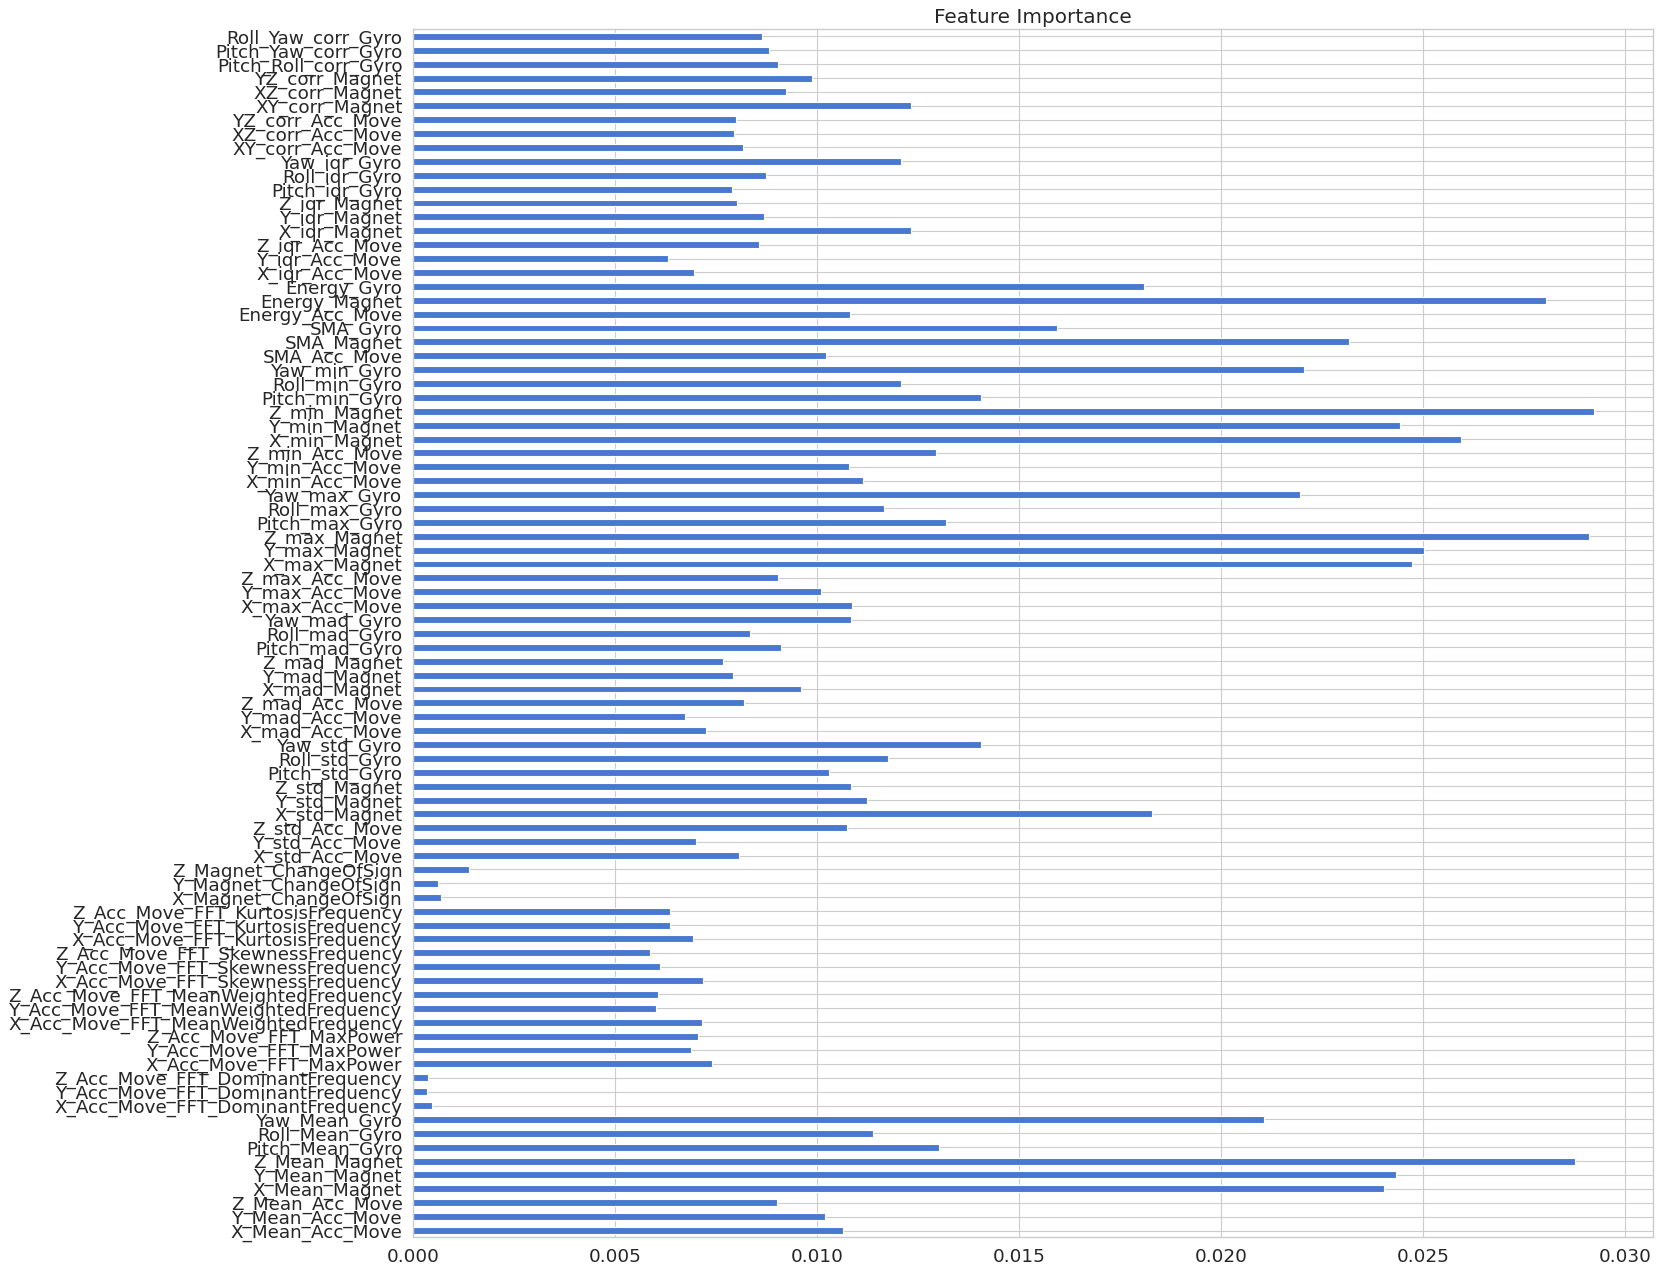

In [ ]:

figure(figsize=(20, 20), dpi=80)

plt.title("Feature Importance")
(pd.Series(clf_rfc.feature_importances_, index=X_train.columns).plot(kind='barh'))

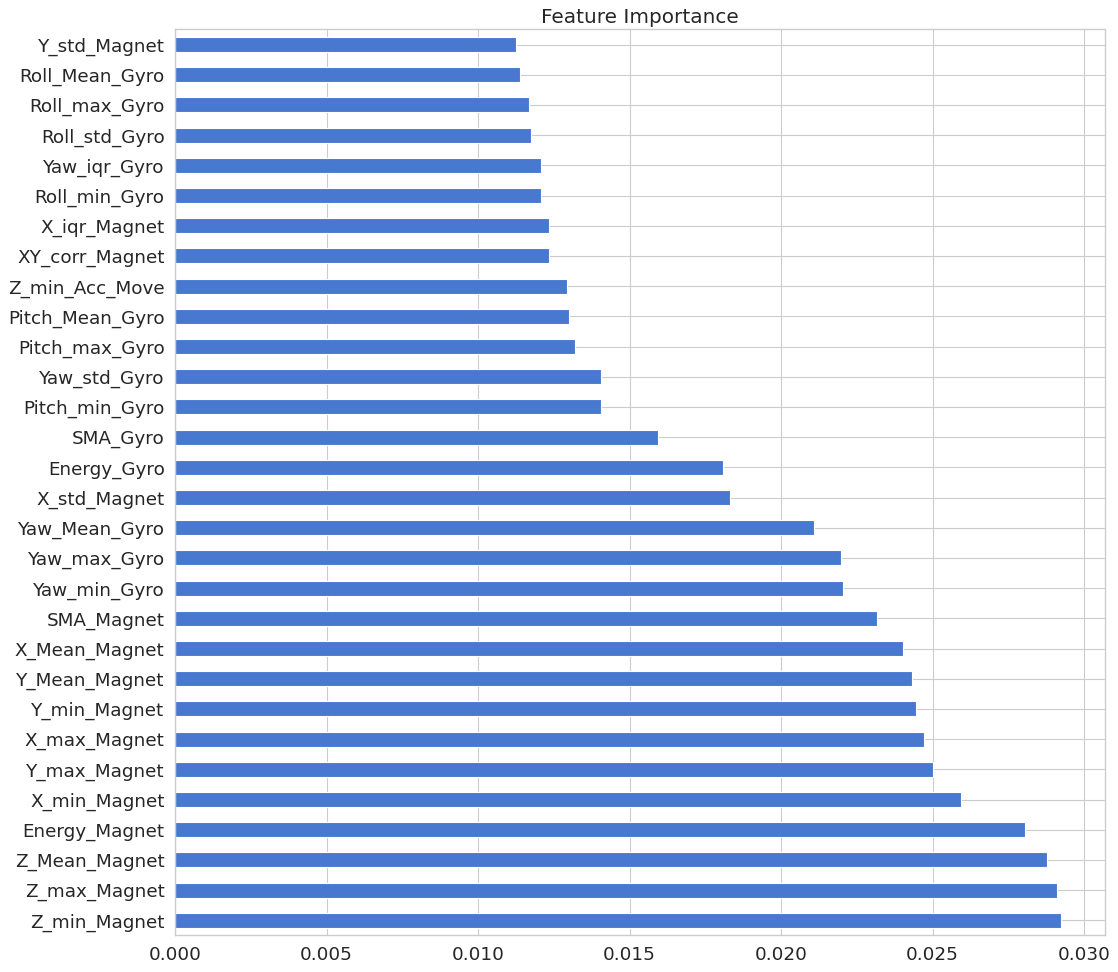

In [ ]:

figure(figsize=(15, 15), dpi=80)

plt.title("Feature Importance")
(pd.Series(clf_rfc.feature_importances_, index=X_train.columns).nlargest(30).plot(kind='barh'))


In [ ]:
# get importance
importance = clf_rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.00835
Feature: 1, Score: 0.00831
Feature: 2, Score: 0.00578
Feature: 3, Score: 0.02757
Feature: 4, Score: 0.04107
Feature: 5, Score: 0.05004
Feature: 6, Score: 0.00907
Feature: 7, Score: 0.00877
Feature: 8, Score: 0.01687
Feature: 9, Score: 0.00029
Feature: 10, Score: 0.00027
Feature: 11, Score: 0.00022
Feature: 12, Score: 0.00557
Feature: 13, Score: 0.00514
Feature: 14, Score: 0.00556
Feature: 15, Score: 0.00473
Feature: 16, Score: 0.00460
Feature: 17, Score: 0.00427
Feature: 18, Score: 0.00478
Feature: 19, Score: 0.00392
Feature: 20, Score: 0.00416
Feature: 21, Score: 0.00444
Feature: 22, Score: 0.00388
Feature: 23, Score: 0.00382
Feature: 24, Score: 0.00053
Feature: 25, Score: 0.00094
Feature: 26, Score: 0.00107
Feature: 27, Score: 0.00528
Feature: 28, Score: 0.00525
Feature: 29, Score: 0.00797
Feature: 30, Score: 0.01565
Feature: 31, Score: 0.00960
Feature: 32, Score: 0.00841
Feature: 33, Score: 0.00948
Feature: 34, Score: 0.01074
Feature: 35, Score: 0.01167
Fe

# Feature Selection 

In [ ]:
# configure to select a subset of features
fs = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=30)


# learn relationship from training data
fs.fit(X_train_scale , y_train)

# transform train input data
X_train_scale_fs = fs.transform(X_train_scale)
# transform test input data
X_test_scale_fs = fs.transform(X_test_scale)

# Classifier after selection on features 

In [ ]:
clf_rfc_fs = RandomForestClassifier()

clf_rfc_fs.fit(X_train_scale_fs , y_train)

preds_rfc_fs= clf_rfc_fs.predict(X_train_scale_fs )


print("Train Accuracy : \t\t" ,accuracy_score(y_train, preds_rfc_fs))
print("Train Balanced Accuracy : \t" , balanced_accuracy_score(y_train, preds_rfc_fs))
#print("F1 Score : \t\t" , f1_score(y_test, preds , average='weighted'))

Train Accuracy : 		 1.0
Train Balanced Accuracy : 	 1.0


In [ ]:
# test
preds_rfc_fs_test = clf_rfc_fs.predict(X_test_scale_fs )


print("Accuracy : \t\t" ,accuracy_score(y_test, preds_rfc_fs_test))
print("Balanced Accuracy : \t" , balanced_accuracy_score(y_test, preds_rfc_fs_test))
#print("F1 Score : \t\t" , f1_score(y_test, preds , average='weighted'))

Accuracy : 		 0.6083180396515625
Balanced Accuracy : 	 0.5530418310332532


<br>

Can drop over 50 features and maintain approx the same percentage range

---------------------------

Now check on all baselines

In [ ]:
from sklearn.metrics import accuracy_score, log_loss , recall_score , f1_score, precision_score , roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

classifiers = [
               
    # Too much computation to run now since using entire data and not segmenting on location 
    ##KNeighborsClassifier(),
    ##GradientBoostingClassifier(),
    ##LabelPropagation(),

    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LinearSVC(),
    SGDClassifier(),
    MLPClassifier(),
    PassiveAggressiveClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
  
    
     ]


# list to hold for dataframe
classifier_name_list = []
train_acc_list = []
train_bacc_list = []
test_acc_list = []
test_bacc_list = []
train_recall_list = []
test_recall_list = []
train_precision_list = []
test_precision_list = []
train_f1_list = []
test_f1_list = []


for clf in classifiers:
    
    name = clf.__class__.__name__
    
    print("="*50)
    print(name)

    clf.fit(X_train_scale_fs, y_train)
    
    print('****Results****')

    # Test Predictions
    test_predictions = clf.predict(X_test_scale_fs)

    # Test Metrics
    acc            = accuracy_score(y_test, test_predictions)
    bal_acc        = balanced_accuracy_score(y_test, test_predictions)
    recall_test    = recall_score(y_test, test_predictions, average = 'weighted')
    f1_test        = f1_score(y_test, test_predictions ,  average = 'weighted')
    precision_test = precision_score(y_test, test_predictions,  average = 'weighted') 



    # Train Predictions
    train_predictions = clf.predict(X_train_scale_fs)

    # Train Metrics
    train_acc       = accuracy_score(y_train, train_predictions)
    train_bal_acc   = balanced_accuracy_score(y_train, train_predictions)
    recall_train    = recall_score(y_train, train_predictions , average = 'weighted')
    f1_train        = f1_score(y_train, train_predictions ,  average = 'weighted')
    precision_train = precision_score(y_train, train_predictions,  average = 'weighted') 

    print("\n\nTest Classification Report\n")
    print(classification_report(y_test, test_predictions))

    # append to list to make a dataframe 
    classifier_name_list.append(name)
    train_acc_list.append(train_acc)
    test_acc_list.append(acc)

    train_bacc_list.append(train_bal_acc)
    test_bacc_list.append(bal_acc)

    train_recall_list.append(recall_train)
    test_recall_list.append(recall_test)

    train_precision_list.append(precision_train)
    test_precision_list.append(precision_test)

    train_f1_list.append(f1_train)
    test_f1_list.append(f1_test)




print("="*50)

DecisionTreeClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.56      0.55      0.55      2214
      Turn 1       0.55      0.57      0.56     10801
      Turn 2       0.58      0.56      0.57     10754
      Walk 1       0.35      0.34      0.34      4790
      Walk 2       0.42      0.38      0.40      6471
         sit       0.38      0.42      0.40      3657

    accuracy                           0.49     38687
   macro avg       0.47      0.47      0.47     38687
weighted avg       0.49      0.49      0.49     38687

RandomForestClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.78      0.54      0.64      2214
      Turn 1       0.61      0.78      0.68     10801
      Turn 2       0.65      0.70      0.67     10754
      Walk 1       0.52      0.33      0.41      4790
      Walk 2       0.56      0.46      0.51     

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.54      0.27      0.36      2214
      Turn 1       0.35      0.53      0.42     10801
      Turn 2       0.39      0.52      0.44     10754
      Walk 1       0.40      0.10      0.16      4790
      Walk 2       0.38      0.20      0.26      6471
         sit       0.42      0.21      0.28      3657

    accuracy                           0.37     38687
   macro avg       0.41      0.31      0.32     38687
weighted avg       0.39      0.37      0.35     38687

SGDClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.22      0.11      0.14      2214
      Turn 1       0.34      0.53      0.42     10801
      Turn 2       0.39      0.33      0.36     10754
      Walk 1       0.19      0.15      0.17      4790
      Walk 2       0.31      0.18      0.23      6471
         sit       0.17   

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.67      0.48      0.56      2214
      Turn 1       0.57      0.68      0.62     10801
      Turn 2       0.61      0.62      0.62     10754
      Walk 1       0.44      0.27      0.34      4790
      Walk 2       0.45      0.45      0.45      6471
         sit       0.44      0.45      0.44      3657

    accuracy                           0.54     38687
   macro avg       0.53      0.49      0.50     38687
weighted avg       0.54      0.54      0.53     38687

PassiveAggressiveClassifier
****Results****


Test Classification Report

              precision    recall  f1-score   support

          Go       0.38      0.26      0.31      2214
      Turn 1       0.32      0.51      0.39     10801
      Turn 2       0.31      0.10      0.15     10754
      Walk 1       0.13      0.11      0.12      4790
      Walk 2       0.22      0.32      0.26      6471
         sit

In [ ]:
train_metrics_df = pd.DataFrame()
test_metrics_df = pd.DataFrame()


train_metrics_df['Classifier'] = classifier_name_list
test_metrics_df['Classifier'] = classifier_name_list

# F1 Score First 
train_metrics_df['Train F1'] = train_f1_list
test_metrics_df['Test F1'] = test_f1_list 

# Recall
train_metrics_df['Train Recall'] = train_recall_list
test_metrics_df['Test Recall'] = test_recall_list

# Precision 
train_metrics_df['Train Precision'] = train_precision_list
test_metrics_df['Test Precision'] = test_precision_list

# Bal Acc
train_metrics_df['Train Balanced Accuracy'] = train_bacc_list
test_metrics_df['Test Balanced Accuracy'] = test_bacc_list

# Accuracy 
train_metrics_df['Train Accuracy'] = train_acc_list
test_metrics_df['Test Accuracy'] = test_acc_list 


train_metrics_df.sort_values("Train F1" , ascending=False , inplace=True)
train_metrics_df.set_index('Classifier' , inplace=True)

test_metrics_df.sort_values("Test F1" , ascending=False , inplace=True)
test_metrics_df.set_index('Classifier' , inplace=True)

# display df
display(train_metrics_df)

,Train F1,Train Recall,Train Precision,Train Balanced Accuracy,Train Accuracy
Classifier,,,,,
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
ExtraTreesClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
BaggingClassifier,0.993140,0.993144,0.993175,0.992027,0.993144
MLPClassifier,0.622808,0.628844,0.627093,0.585152,0.628844
AdaBoostClassifier,0.444814,0.456917,0.449748,0.422683,0.456917
LinearSVC,0.374857,0.395682,0.422808,0.336929,0.395682
LinearDiscriminantAnalysis,0.370847,0.385213,0.404135,0.340192,0.385213
SGDClassifier,0.309288,0.325802,0.310915,0.254473,0.325802


In [ ]:
# display df
display(test_metrics_df)

,Test F1,Test Recall,Test Precision,Test Balanced Accuracy,Test Accuracy
Classifier,,,,,
ExtraTreesClassifier,0.602915,0.613901,0.610906,0.550802,0.613901
RandomForestClassifier,0.598503,0.608085,0.604660,0.552522,0.608085
BaggingClassifier,0.562579,0.571975,0.565749,0.523132,0.571975
MLPClassifier,0.534493,0.541112,0.537068,0.492095,0.541112
DecisionTreeClassifier,0.493866,0.494223,0.494154,0.471599,0.494223
AdaBoostClassifier,0.409428,0.422131,0.413795,0.390897,0.422131
LinearSVC,0.350934,0.374441,0.386831,0.305977,0.374441
LinearDiscriminantAnalysis,0.344004,0.361465,0.374971,0.313462,0.361465
SGDClassifier,0.300147,0.313826,0.307391,0.247734,0.313826


----------------------------------

# XGBClassifier

In [ ]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Random Grid Search to Optimize model

# set up parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
              "gamma" : [0.01, 0.1, 0.3, 0.5, 1],
              "max_depth": [2, 5, 10],
              "reg_alpha": [0, 0.5, 1],
              "reg_lambda": [1, 1.5, 2, 3, 4.5],
              "min_child_weight": [1, 3, 5],
              "n_estimators": [10, 50, 100]

              }


xgb_clf = xgb.XGBClassifier()

gsearch = RandomizedSearchCV(estimator = xgb_clf,
                        param_distributions = parameters,  
                        scoring = 'balanced_accuracy',                
                        cv = 2,
                        n_jobs = -1,
                        verbose = 4)


In [ ]:
grid_search = gsearch.fit(X_train_scale_fs, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
gs_model = grid_search.best_estimator_

In [ ]:
grid_search.best_params_

{'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 0.5,
 'reg_lambda': 2}

In [ ]:
from sklearn.metrics import balanced_accuracy_score , recall_score , precision_score, f1_score

In [ ]:
xgb_clf.fit(X_train_scale, y_train)

preds = xgb_clf.predict(X_test_scale)


print("Test Balanced Accuracy : \t" , balanced_accuracy_score(y_test, preds))
print("Test F1 Score : \t\t" , f1_score(y_test, preds , average='weighted'))
print("Test Precision Score : \t\t" , precision_score(y_test, preds , average='weighted'))
print("Test Recall Score : \t\t" , recall_score(y_test, preds , average='weighted'))

In [ ]:
gs_model.fit(X_train_scale_fs, y_train)

preds_gs = gs_model.predict(X_test_scale_fs)

print(balanced_accuracy_score(y_test, preds_gs ))

-------------------------------------------------

In [ ]:
def holdout_checker_xgb(smote = False ):

  # Read in Fresh Data to see what predictions looks like
  from google.colab import files
  uploaded_test = files.upload()

  # getting keys, which is file names of csv
  val_file_name = [key for key in uploaded_test.keys()]

  # read in csv 
  signal_test = pd.read_csv(val_file_name[0])


  # Getting X_train & y_train
  X_data = signal_test.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run','X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands' ], axis = 1)
  y_data = signal_test['Label_segment'].values

  # scale with already fit ss 
  X_data_scale = ss.transform(X_data)

  # feature selection
  #X_data_scale_fs = fs.transform(X_data_scale)


  # if selecting smote trained model
  if smote == True:
    hold_preds = model_smote.predict(X_data_scale_fs)

  # else non-smote trained model
  else:
    hold_preds = xgb_clf.predict(X_data_scale)

  # take max of predictions 
  #max_predictions = np.argmax(hold_preds, axis=1)

  # metrics 
  print("\n---------------------- Metrics ----------------------------------------")

  print("Accuracy : \t\t" ,accuracy_score(y_data, hold_preds))
  print("Balanced Accuracy : \t" , balanced_accuracy_score(y_data, hold_preds))
  #print("F1 Score : \t\t" , f1_score(y_data, hold_preds, average='weighted'))


  # set up labels 
  LABELS = ['Go', 'Turn1',  'Turn2' , 'Walk1', 'Walk2', 'Sit']

  # classification report 
  print("\n------------------- HoldOut Classification Report ---------------")
  print(classification_report(y_data , hold_preds))
  print(" ")

  # confusion matrix
  confusion_matrix_out = metrics.confusion_matrix(y_data, hold_preds )

  plt.figure(figsize=(14, 10))
  sns.heatmap(confusion_matrix_out, xticklabels=LABELS, yticklabels=LABELS, annot=True ,fmt="d" );
  plt.title("HoldOut Data Confusion matrix")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

  # lastly just printing actual predictions
  print("\n0 = Go \t\t 1 = Turn 1 \t 2 = Turn 2")
  print("\n3 = Walk 1 \t 4 = Walk 2 \t 5 = Sit")

  print(" ")
  print(hold_preds)

  print(Counter(hold_preds))

Saving 86_9_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 86_9_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP

---------------------- Metrics ----------------------------------------
Accuracy : 		 0.5338645418326693
Balanced Accuracy : 	 0.419315500879666

------------------- HoldOut Classification Report ---------------
              precision    recall  f1-score   support

          Go       1.00      0.14      0.25        14
      Turn 1       0.65      0.89      0.75        79
      Turn 2       0.45      0.43      0.44        53
      Walk 1       0.25      0.09      0.14        32
      Walk 2       0.36      0.55      0.43        44
         sit       1.00      0.41      0.59        29

    accuracy                           0.53       251
   macro avg       0.62      0.42      0.43       251
weighted avg       0.57      0.53      0.51       251

 


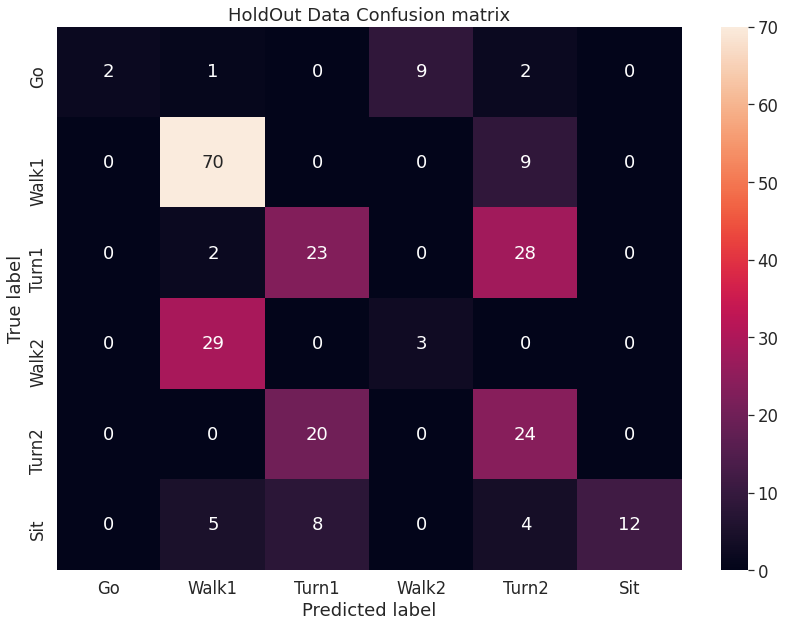


0 = Go 		 1 = Turn 1 	 2 = Turn 2

3 = Walk 1 	 4 = Walk 2 	 5 = Sit
 
['Turn 1' 'Walk 2' 'Go' 'Go' 'Walk 1' 'Walk 2' 'Walk 1' 'Walk 1' 'Walk 1'
 'Walk 1' 'Walk 1' 'Walk 1' 'Walk 1' 'Walk 1' 'Walk 1' 'Walk 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Walk 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn

In [ ]:
holdout_checker_xgb()

----------------------------------------

K NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score , precision_score , recall_score 

In [ ]:
acc_list       = []
bal_acc_list   = []
recall_list    = [] 
precision_list = []
f1_list        = []


for i in range(1,40, 2):

  # track run
  print(i)
 
  # fitting & predicitons 
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scale, y_train)
  pred_i = knn.predict(X_test_scale)

  # Metrics of interest results
  acc_i       = accuracy_score(y_test ,pred_i)
  bal_acc_i   = balanced_accuracy_score(y_test ,pred_i)
  recall_i    = recall_score(y_test , pred_i , average = 'weighted')
  f1_i        = f1_score(y_test , pred_i ,  average = 'weighted')
  precision_i = precision_score(y_test , pred_i,  average = 'weighted') 

  # append results 
  acc_list.append(acc_i)
  bal_acc_list.append(bal_acc_i)
  recall_list.append(recall_i)
  precision_list.append(f1_i)
  f1_list.append(precision_i)

1


KeyboardInterrupt: ignored

Text(0, 0.5, 'Error Rate')

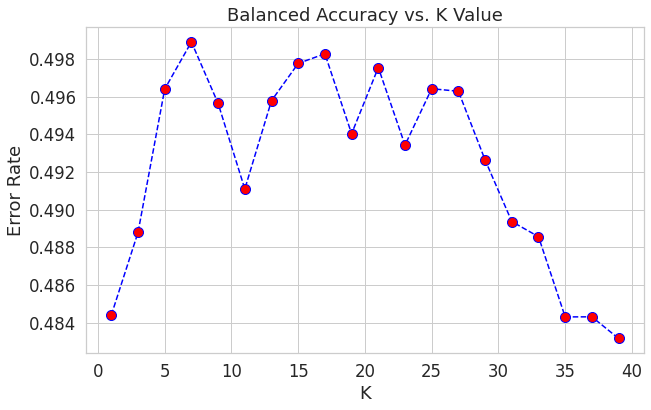

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40,2),bal_acc_list,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Balanced Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Balanced Accuracy')

Text(0, 0.5, 'Error Rate')

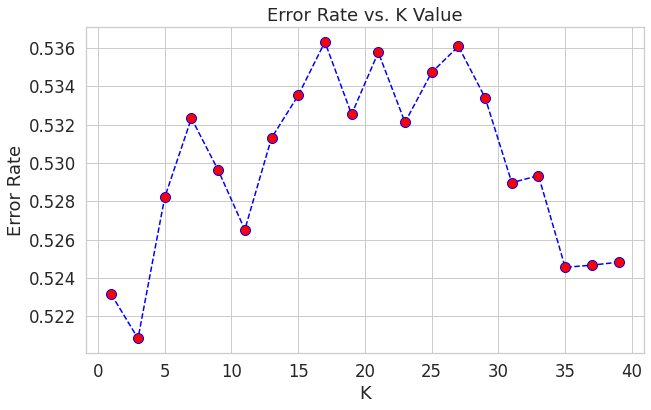

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40,2),f1_list,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('F1 Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1 Score')

In [ ]:
# K = 17

knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train_scale_fs, y_train)
preds_knn = knn_clf.predict(X_test_scale_fs)


print("Accuracy : \t\t" ,accuracy_score(y_test, preds_knn))
print("Balanced Accuracy : \t" , balanced_accuracy_score(y_test, preds_knn))
#print("F1 Score : \t\t" , f1_score(y_data, hold_preds, average='weighted'))

Accuracy : 		 0.5935495058089127
Balanced Accuracy : 	 0.5583225214023978


In [ ]:
def holdout_checker_knn(smote = False ):

  # Read in Fresh Data to see what predictions looks like
  from google.colab import files
  uploaded_test = files.upload()

  # getting keys, which is file names of csv
  val_file_name = [key for key in uploaded_test.keys()]

  # read in csv 
  signal_test = pd.read_csv(val_file_name[0])


  # Getting X_train & y_train
  X_data = signal_test.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run','X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands' ], axis = 1)
  y_data = signal_test['Label_segment'].values

  # scale with already fit ss 
  X_data_scale = ss.transform(X_data)

  # feature selection
  X_data_scale_fs = fs.transform(X_data_scale)


  # if selecting smote trained model
  if smote == True:
    hold_preds = model_smote.predict(X_data_scale_fs)

  # else non-smote trained model
  else:
    hold_preds = knn_clf.predict(X_data_scale_fs)

  # take max of predictions 
  #max_predictions = np.argmax(hold_preds, axis=1)

  # metrics 
  print("\n---------------------- Metrics ----------------------------------------")

  print("Accuracy : \t\t" ,accuracy_score(y_data, hold_preds))
  print("Balanced Accuracy : \t" , balanced_accuracy_score(y_data, hold_preds))
  #print("F1 Score : \t\t" , f1_score(y_data, hold_preds, average='weighted'))


  # set up labels 
  LABELS = ['Go', 'Turn1',  'Turn2' , 'Walk1', 'Walk2', 'Sit']

  # classification report 
  print("\n------------------- HoldOut Classification Report ---------------")
  print(classification_report(y_data , hold_preds))
  print(" ")

  # confusion matrix
  confusion_matrix_out = metrics.confusion_matrix(y_data, hold_preds )

  plt.figure(figsize=(14, 10))
  sns.heatmap(confusion_matrix_out, xticklabels=LABELS, yticklabels=LABELS, annot=True ,fmt="d" );
  plt.title("HoldOut Data Confusion matrix")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

  # lastly just printing actual predictions
  print("\n0 = Go \t\t 1 = Turn 1 \t 2 = Turn 2")
  print("\n3 = Walk 1 \t 4 = Walk 2 \t 5 = Sit")

  print(" ")
  print(hold_preds)

  print(Counter(hold_preds))

Saving 81_9_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 81_9_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP (5)

---------------------- Metrics ----------------------------------------
Accuracy : 		 0.5441176470588235
Balanced Accuracy : 	 0.4663038219641993

------------------- HoldOut Classification Report ---------------
              precision    recall  f1-score   support

          Go       0.00      0.00      0.00        13
      Turn 1       0.56      0.61      0.58       106
      Turn 2       0.81      0.65      0.72       100
      Walk 1       0.43      0.07      0.13        40
      Walk 2       0.54      0.58      0.56        65
         sit       0.22      0.88      0.35        16

    accuracy                           0.54       340
   macro avg       0.43      0.47      0.39       340
weighted avg       0.58      0.54      0.53       340

 


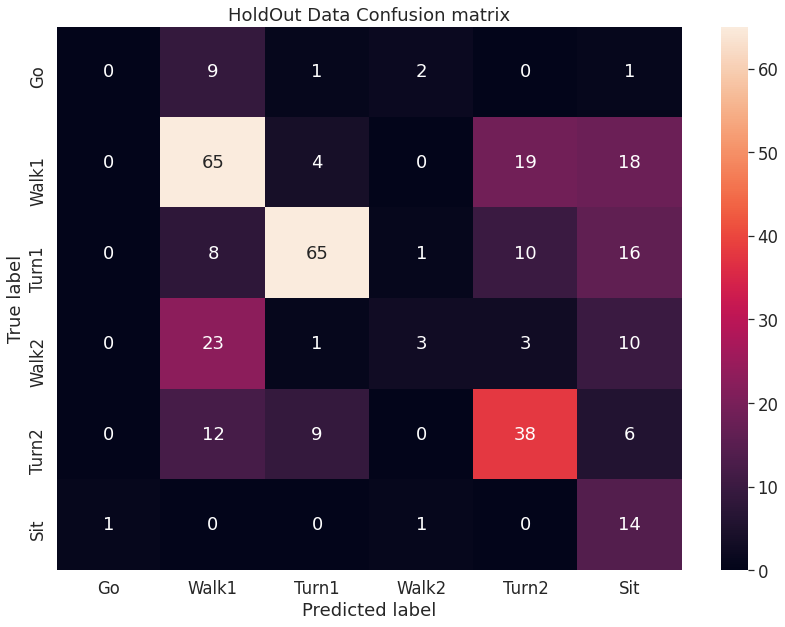


0 = Go 		 1 = Turn 1 	 2 = Turn 2

3 = Walk 1 	 4 = Walk 2 	 5 = Sit
 
['Walk 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Walk 1' 'Turn 1' 'Turn 1' 'Turn 2' 'sit' 'sit' 'sit' 'sit' 'sit'
 'Turn 1' 'Turn 1' 'Turn 1' 'sit' 'Turn 1' 'sit' 'sit' 'Turn 1' 'sit'
 'sit' 'Walk 1' 'Walk 1' 'Walk 1' 'sit' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Walk 2' 'Turn 1' 'Turn 1'
 'Turn 2' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Walk 2' 'Turn 1'
 'Walk 2' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 2' 'Turn 2' 'Turn 2' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Walk 2' 'Turn 1' 'Turn 1' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Turn 1' 'Walk 2' 'Walk 2' 'Walk 2'
 'Walk 2' 'Walk 2' 'Walk 2' 'Turn 1' 'Turn 1' 'Turn 1' 'Walk 2' 'Turn 1'
 'Turn 1' 'Turn 1' 'Turn 1' 'sit' 'Turn 1' 'Turn 1' 'Walk 2' 'Walk 

In [ ]:
holdout_checker_knn()